# 実験計画(Design of Experiments)
基本的にリソースが有限である化学・材質・バイオ関係の研究では試薬や材料を使える回数が限られる。そこで、直行表を使うことで少ない回数の実験で有効的な知見を得る必要がある。今回は典型例として各2水準で3因子の場合のL8で行う。

ここでは、鍋の材質、塩の有無、蓋の有無で沸騰までの時間にどれだけ効果が変わるかを測定するため、5分間加熱した時の温度変化を効果量とする。

データは以下から

https://econoshift.com/ja/doe_basics/
## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み
このデータはTSV形式(CSVと異なりカンマではなくタブ区切り)となっているため引数に注意

In [2]:
df = pd.read_csv("doe_sample.csv", sep="\t")
df

,material,salt,lid,temp
0,stainless,no,no,75.9
1,stainless,no,yes,76.4
2,stainless,yes,no,63.1
3,stainless,yes,yes,71.9
4,iron,no,no,57.5
5,iron,no,yes,69.1
6,iron,yes,no,34.8
7,iron,yes,yes,63.9


### 因子と水準ごとの分布を格納

In [3]:
columns = ["material", "salt", "lid"]
vals = []
name1 = []
cnt = []
count = 0
for col in columns:
    tmp = []
    name = []
    tmpc = []
    value = list(set(df[col].values))
    for val in value:
        df_q = df.query("%s=='%s'"%(col, val))
        tmp.append(df_q["temp"].values.tolist())
        name.append(col+"_"+str(val))
        tmpc.append(count)
        count = count + 1
    vals.append(tmp)
    name1.append(name)
    cnt.append(tmpc)

### 各因子の分布と平均値を可視化
箱ひげ図で各因子の分布を可視化して折れ線グラフで各因子の平均値を可視化する。ここで全ての因子は評価値が沸騰までの時間であるため単位が統一されており、折れ線グラフの勾配が大きい(平均値の差:DID)ほど効果量の違いが明確になる。

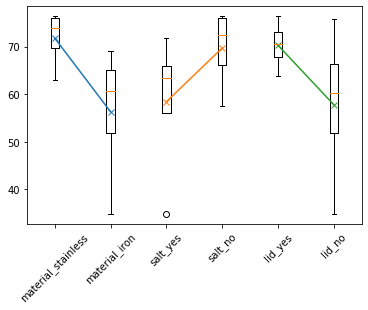

In [4]:
count = 0
for i in range(len(vals)):
    plt.boxplot(vals[i], positions=cnt[i], labels=name1[i])
    ave = []
    for j in range(len(vals[i])):
        ave.append(sum(vals[i][j])/len(vals[i][j]))
    plt.plot(cnt[i], ave, marker="x")
plt.xticks(rotation=45)
plt.show()

この結果からステンレス製にして塩は無く蓋はあった方が5分間での温度上昇が大きい傾向がある。また、因子別の効果量としては勾配から材質である鉄とステンレスが最も効果量があると考えられる。